# Biomedical Data Science & AI

# Exercise sheet 7 - Introduction - Due date: June 15th

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - Elastic Net & Nested Cross-Validation (11 points)

1. Using the titanic_survival_data.csv dataset, train a logistic regression model with
elastic net penalization to demonstrate the pros and cons of the different data
splitting methods and give a short description on what you observe.


a. Report the accuracy of data splitting with a test size of 0.2 and random
state as 1. (1 point)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from pandas import read_csv
import pandas as pd
import numpy as np 
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")


df= pd.read_csv('/titanic_survival_data.csv')
x1 = df.drop('Label', axis=1).values 
y1 = df['Label'].values
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 78.77%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


b. Plot the boxplot for the accuracy of the KFold cross validation with 5 splits.
(1 point)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

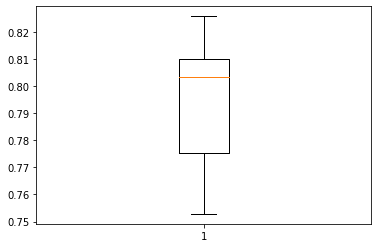

In [ ]:
from matplotlib import pyplot
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)
boxplot =pyplot .boxplot(results_kfold)

c. Plot the boxplot for the accuracy of the StratifiedKfold cross validation with
5 splits. (1 point)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

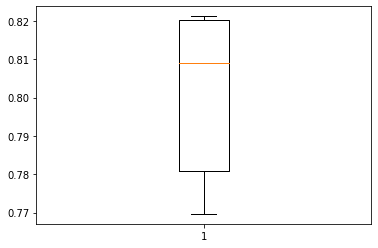

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, x1, y1, cv=skfold)
#print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
boxplot =pyplot .boxplot(results_skfold)

d. Inform yourself about leave-one-out cross-validation (LOOCV). Implement
LOOCV and mention the pros and cons of the method. (2 point)


The Leave-One-Out Cross-Validation, or LOOCV, procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

pros and cons:

It is a computationally expensive procedure to perform, although it results in a reliable and unbiased estimate of model performance. Although simple to use and no configuration to specify, there are times when the procedure should not be used, such as when you have a very large dataset or a computationally expensive model to evaluate


In [ ]:
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression()
results_loocv = model_selection.cross_val_score(model_loocv, x1, y1, cv=loocv)
#print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

2. Use the nested cross validation to train a logistic regression with elastic net
penalization (leukemia_small.csv).


a. Split the data into training and test samples using an appropriate cross
validation method, and in the inner loop carry out hyperparameter
optimization. (2 points)


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, auc
from numpy import mean, std

In [2]:
file = pd.read_csv("leukemia_small.csv", header = None)
file.isna().any() #checking if any null values

df = file.replace("ALL", 0).replace("AML", 1).transpose()
X = df.drop(0, axis = 1).values
y = df[0].values
y=y.astype('int')

In [3]:
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

outer_acc = []
outer_roc = []
outer_pr = []

for train, test in cv_outer.split(X):
    X_train, X_test = X[train, :], X[test, :]
    y_train, y_test = y[train], y[test]
    
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    
    model = LogisticRegression()
    params = {'solver':['saga'], 'penalty': ['elasticnet'], 'C':[10, 1.0, 0.1],'l1_ratio':[0.1, 0.5, 0.9], 
             'max_iter':[500]}
    
    gs = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner, refit=True)
    
    res = gs.fit(X_train, y_train)
    best_model = res.best_estimator_
    pred = best_model.predict(X_test)
    
    # evaluate the model
    acc = accuracy_score(y_test, pred)
    outer_acc.append(acc)
    
    roc = roc_auc_score(y_test, pred)
    outer_roc.append(roc)
    
    rec, pr, thres = precision_recall_curve(y_test, pred)
    outer_pr.append(auc(rec,pr))

b. Compute the area under the ROC curve (AUC-ROC) and the area under
the precision-recall curve (AUC-PR). (1 point)


In [4]:
print('Area under ROC curve, AUC-ROC: {:.3f} ({:.3f})'.format(mean(outer_roc), std(outer_roc)))
print('Area under precision-recall curve, AUC-PR: {:.3f} ({:.3f})'.format(mean(outer_pr), std(outer_pr)))

Area under ROC curve, AUC-ROC: 0.978 (0.028)
Area under precision-recall curve, AUC-PR: 0.032 (0.042)


c. Plot separate boxplots for the 2 performance metrics. (1 point)


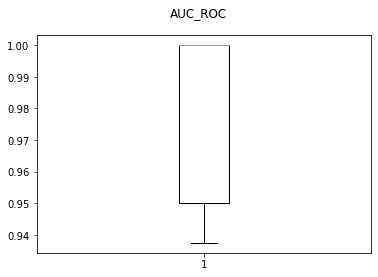

In [5]:
# boxplot
fig = plt.figure()
fig.suptitle('AUC_ROC')
plt.boxplot(outer_roc)
plt.show()

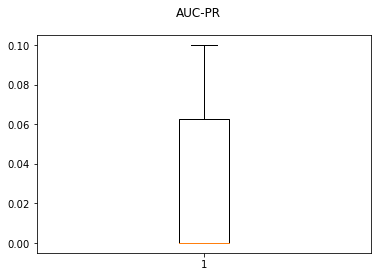

In [6]:
# boxplot
fig = plt.figure()
fig.suptitle('AUC-PR')
plt.boxplot(outer_pr)
plt.show()

3. In your own words, explain how each of the following metrics can be used to
assess the performance of a model and then calculate each metric using the
following confusion matrix. (2 points)


a. Recall


b. F1

c. Balanced Accuracy (BAC)

d. Matthews Correlation Coefficient (MCC)

**Given Confusion matrix:**
+ TN = 250 (True Negative)
+ FP = 20 (False Positive)
+ FN = 30 (False Negative)
+ TP = 100 (True Positive)

-> Recall: It is the true positive rate or sensitivity. It is the ratio of correct positive predictions to the total positives examples. It should ideally be 1 for a good classifier.

-> F1 score: This metric takes into account both precision and recall. It is the harmonic mean of precision and recall. Hence when both of them are high, this is high and is ideally 1 for good classifier.

-> Balanced Accuracy (BAC): This metric takes into account recall and specificity. It is the arithmetic mean of those values. It helps to account for the imbalance in classes.

-> Matthews Correlation Coefficient (MCC): MCC takes all cells of confusion matrix into account. the range of values of MCC lie between -1 to +1. A model with a score of +1 is a perfect model and -1 is a poor model. This property is useful because it is easy to interpret.

In [2]:
import math 
TN = 250
FP = 20
FN = 30
TP = 100

precision = TP / (TP + FP )
recall = TP / (TP + FN)
f1 = (2*precision*recall)/(precision+recall)
specificity = TN / (FP + TN)
BAC = (recall + specificity) /2
MCC = ((TP * TN) - (FP * FN)) / math.sqrt((TP+FP) * (TP+FN) * (TN+FP) * (TN + FN))

print("Recall: {:.3f}, F1 Score = {:.3f}, BAC = {:.3f}, MCC = {:.3f}".format(recall, f1, BAC, MCC))

Recall: 0.769, F1 Score = 0.800, BAC = 0.848, MCC = 0.711


# Exercise 2 - SVM (4 points)

1) Inform yourself about SVM and briefly explain the working strategy of linear SVM
and why maximizing the margin is a good strategy. (2 points)


<b>Working Strategy:</b>

The linear SVM works by creating the Hyperplane that classifies all the training vectors into two classes or the space into two disconnected parts.


We can also create two or more hyperplanes to classsify correctly all the instances in the feature set.

But the best(optimal) choice of hyperplane will be the one which leaves the maximum margin from both the classes i.e, the positive and negative hyperplane. The margin is the distance between the hyperplane and the closest elements from the hyperplane( or the the positive and negative hyperplane).

Once the hyperplane is chosen, we can define the classes of space by defining the distance bwteen the closest elements is atleast 1. 

The closest elements/points are known as the Support vectors.


   
<b>Maximising Margin as Strategy:</b>

Maximizing the margin will give best results because points near the decision boundary represent very uncertain classification decisions: there is almost a 50% chance of the classifier deciding either way. A classifier with a large margin makes easier for making decision to which side,the new data points belongs to. So, it reduces the generlisation error.
    

2) Inform yourself about the non-linearity problem for classifiers. Briefly explain how
SVM uses kernel trick to overcome this issue. (2 points)

<b>Problem:</b>
    
we cannot create a hyperplane that can separate the samples with non-linear data.

Misclassification of data is possible
 


<b>Solution:</b>
    
The "Kernel trick" is used to learn a linear classifier to classify a non-linear dataset. 

Takes low-dimensional space data as input and gives higher dimensional space to seperate the dataset.

It transforms the linearly inseparable data into a linearly separable one by projecting it into a higher dimension. 

A kernel function is applied on each data instance to map the original non-linear data points into some higher dimensional space in which they become linearly separable. 

# Exercise 3 - Random Forest (10 points)

For the following questions, use random_seed = 1 for better reproducibility of your
answers.


1. Load the breast cancer dataset from sklearn to your Jupyter notebook. Use label
encoding to convert your target variable “class” into numerical form. Split the
dataset using a 5-fold cross validation (1 point)


In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [ ]:
import pandas as pd
dataset = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

In [ ]:
dataset.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [ ]:
dataset.shape

(569, 30)

In [ ]:
target.shape

(569,)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(5,random_state = 1)
for train_index, test_index in kf.split(dataset):

    # Split train and test datasets sing fold index
    X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


2. Set up a parameter grid and use grid search with 5-fold cross validation to
identify the best hyperparameter values used to fit a random forest classifier.
(2 points)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 1)
param_grid = { 
    'n_estimators': [10, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'bootstrap' : [True, False]
}
gs = GridSearchCV(rfc,
param_grid,
cv =5,
verbose = 1,
n_jobs = -1
)

gs_results = gs.fit(X_train,y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:   18.5s


0.9649546106067846
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done 597 out of 600 | elapsed:   30.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   30.2s finished


3. Use the best hyperparameters from 2) to fit the final model. Predict the classes of
the test set and count the number of samples assigned to each class. (2 points)


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
Clf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'log2', n_estimators =10,random_state = 1,bootstrap=True)
Clf.fit(X_train, y_train)
y_pred = Clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",round(accuracy,4))

Accuracy: 0.9646


In [ ]:
classes = classification_report(y_test, y_pred)
print("Classification Report:")
print (classes)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.95      0.98        87

    accuracy                           0.96       113
   macro avg       0.93      0.98      0.95       113
weighted avg       0.97      0.96      0.97       113



After seeing the classification report, it can be observed that there are two classes 0 and 1. The count of class 0 is 26 and class 1 is 87

4. Print the importance of each feature in descending order. Identify the top 5
features. (1 points)


In [ ]:
feature_imp = { dataset.columns[i]:Clf.feature_importances_[i] for i in range(len(Clf.feature_importances_))}
import operator
feature_imp_sorted = sorted(feature_imp.items(),key = operator.itemgetter(1),reverse = True)

In [ ]:
feature_imp_sorted

[('worst radius', 0.22634149506702655),
 ('mean concave points', 0.16654608208177224),
 ('mean perimeter', 0.1209867048222002),
 ('worst area', 0.10701782987111941),
 ('worst perimeter', 0.09369752213945547),
 ('mean concavity', 0.07922470933952326),
 ('worst concave points', 0.04054858280498653),
 ('mean texture', 0.02518634390831016),
 ('worst smoothness', 0.02248401007156575),
 ('worst texture', 0.016423976467931808),
 ('worst fractal dimension', 0.014873957368323486),
 ('worst concavity', 0.011761503874132936),
 ('radius error', 0.011728600276923264),
 ('symmetry error', 0.01109069117426153),
 ('mean smoothness', 0.010160508299127971),
 ('area error', 0.00892034748158182),
 ('worst symmetry', 0.006745332900660225),
 ('worst compactness', 0.005116666163001171),
 ('mean radius', 0.004976604745826125),
 ('smoothness error', 0.003262244191929433),
 ('mean fractal dimension', 0.0025326760698118314),
 ('texture error', 0.002491860508912097),
 ('mean symmetry', 0.0016889885424085118),
 ('

Top 5 important features are: 

'worst radius','mean concave points','mean perimeter','worst area','worst perimeter'

Text(0.5, 0, 'Random Forest Feature Importance')

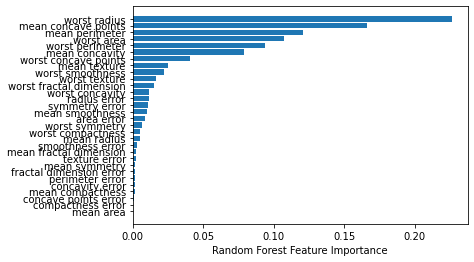

In [ ]:
import matplotlib.pyplot as plt
Clf.fit(X_train,y_train)
Clf.feature_importances_
sorted_idx = Clf.feature_importances_.argsort()
plt.barh(data.feature_names[sorted_idx], Clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

5. Mention a case when permutation feature importance is favored over
impurity-based feature importance. Use permutation importance to print the
importances of your features in a descending order. Compare your answer with
that of 4). Do you notice any differences? (2 points)


Furthermore, the impurity-based feature importance of random forests suffers from being computed on statistics derived from the training dataset: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.

This example shows how to use Permutation Importances as an alternative that can mitigate those limitations.

Text(0.5, 0, 'Permutation Importance')

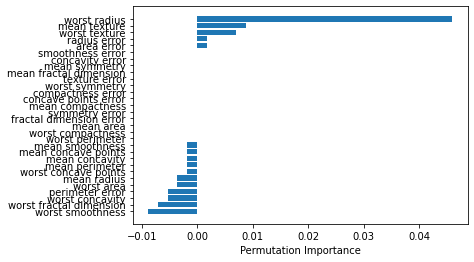

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(Clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(data.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The impurity-based feature importance of random forests suffers from being computed on statistics derived from the training dataset: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.

This example shows how to use Permutation Importances as an alternative that can mitigate those limitations.

According to permutation imortance, top five features are: 

'worst radius','mean texture','worst texture','radius error','area error
'

6. In your own words, explain the bootstrapping technique and mention how
random forest benefits from its application. (2 points)

The bootstrap is statistical method for estimating the sampling distribution of an estimator by sampling with replacement from the original sample, most often with the purpose of deriving robust estimates of standard errors and confidence intervals of a population parameter like a mean, median, proportion, odds ratio, correlation coefficient or regression coefficient.

It is used to to find the consistency of standard error.The bootstrap distribution usually estimates the shape, spread, and bias of the actual sampling distribution. 

Source: https://arifromadhan19.medium.com/resampling-methods-a-simple-introduction-to-the-bootstrap-method-3a36d076852f